In [3]:
import numpy as np

from scipy.constants import codata
import scipy.interpolate as si
import random as rand
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/mnt/act3/users/jpm136/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
Beam_PA1 = np.loadtxt('beam_profile_160201_2013_pa1_instant.txt', unpack=True, delimiter='  ', skiprows=4)
Beam_PA2 = np.loadtxt('beam_profile_160201_2014_pa2_instant.txt', unpack=True, delimiter='  ', skiprows=4)
Beam_PA3_90 = np.loadtxt('beam_profile_170112_2015_pa3_90GHz_instant.txt', unpack=True, delimiter='  ', skiprows=4)
Beam_PA3_150 = np.loadtxt('beam_profile_170112_2015_pa3_150GHz_instant.txt', unpack=True, delimiter='  ', skiprows=4)

Ratio of beam profile at angular separation of 0.055 = 0.020870223246878


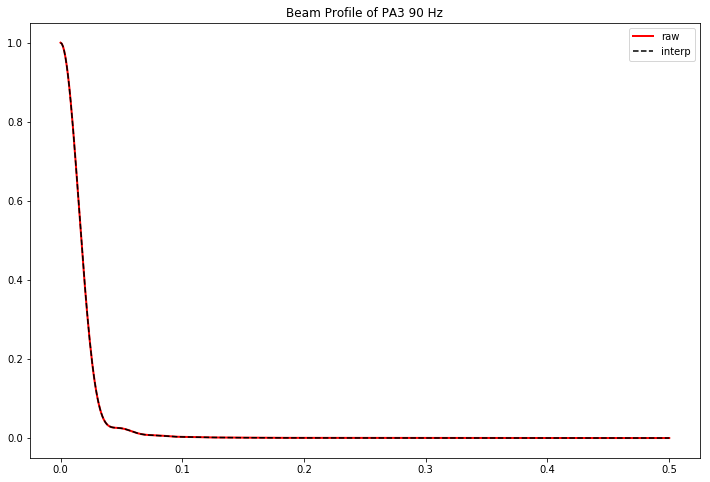

In [3]:
#pa3_90x = np.append(Beam_PA3_90[0],-Beam_PA3_90[0])
#pa3_90y = np.append(Beam_PA3_90[1],Beam_PA3_90[1])

pa3_90x = Beam_PA3_90[0]
pa3_90y = Beam_PA3_90[1]
x = np.linspace(min(pa3_90x),max(pa3_90x),1000)
beam_profile = si.interp1d(pa3_90x,pa3_90y)

plt.figure(figsize=(12,8))
plt.title('Beam Profile of PA3 90 Hz')
plt.plot(pa3_90x,pa3_90y,'r',lw=2,label="raw")
plt.plot(x,beam_profile(x),'k--',label="interp")
plt.legend()

a = 0.055
print 'Ratio of beam profile at angular separation of', a, '=', beam_profile(a)



(-0.1, 0.1)

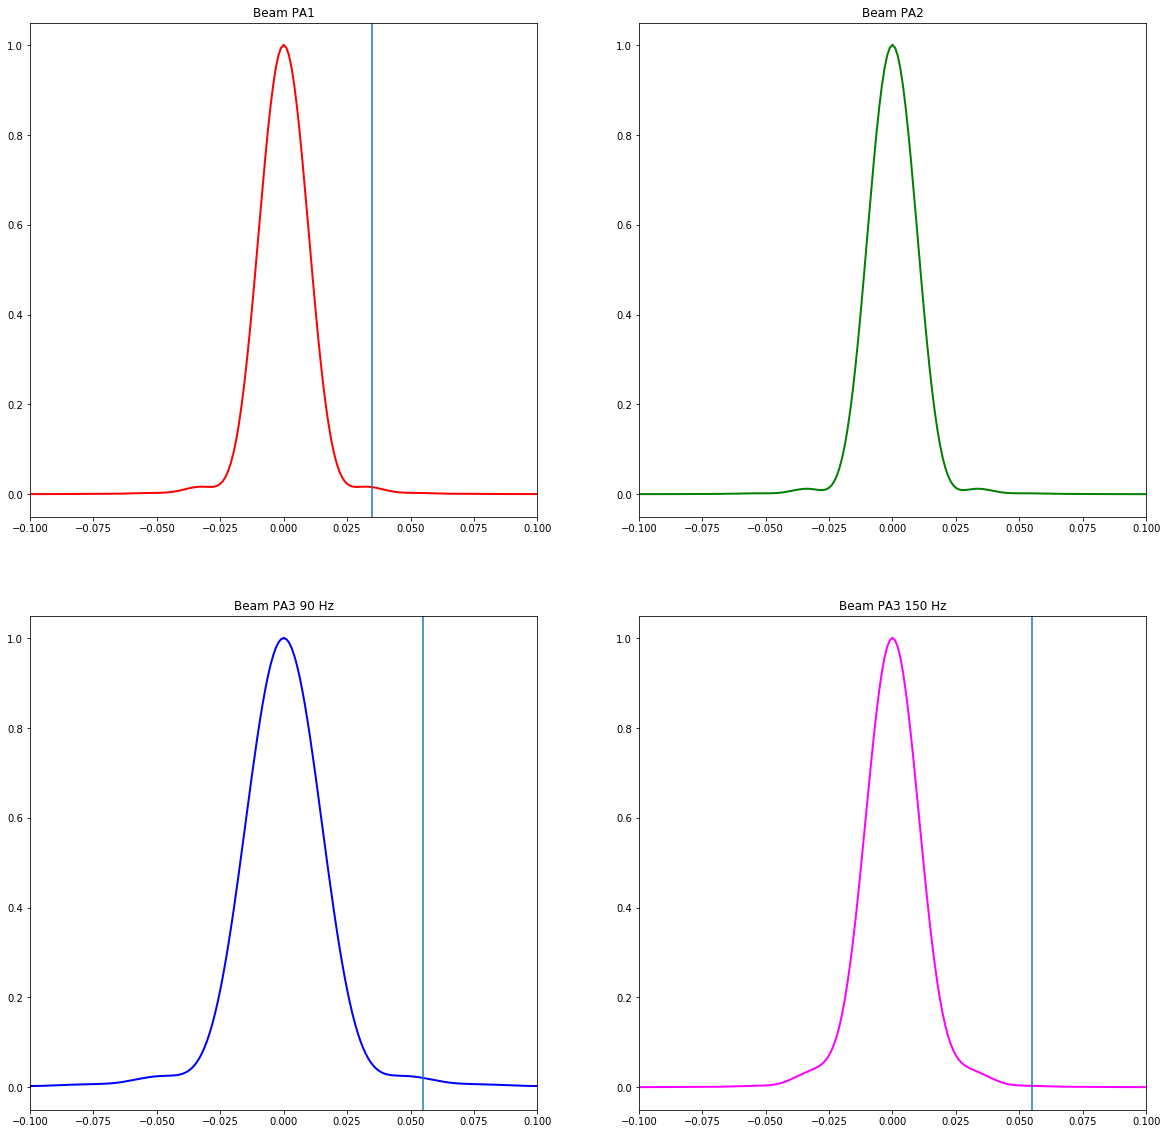

In [34]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.plot(Beam_PA1[0], Beam_PA1[1], color='red', linewidth=2)
plt.plot(-Beam_PA1[0], Beam_PA1[1], color='red', linewidth=2)
plt.axvline(x=.035)
plt.axvline(x=0.9)
plt.title('Beam PA1')
plt.xlim([-0.1, 0.1])

plt.subplot(2,2,2)
plt.plot(Beam_PA2[0], Beam_PA2[1], color='green', linewidth=2)
plt.plot(-Beam_PA2[0], Beam_PA2[1], color='green', linewidth=2)
plt.title('Beam PA2')
plt.xlim([-0.1, 0.1])

plt.subplot(2,2,3)
plt.plot(Beam_PA3_90[0], Beam_PA3_90[1], color='blue', linewidth=2)
plt.plot(-Beam_PA3_90[0], Beam_PA3_90[1], color='blue', linewidth=2)
plt.axvline(x=0.055)
plt.title('Beam PA3 90 Hz')
plt.xlim([-0.1, 0.1])

plt.subplot(2,2,4)
plt.plot(Beam_PA3_150[0], Beam_PA3_150[1], color='magenta', linewidth=2)
plt.plot(-Beam_PA3_150[0], Beam_PA3_150[1], color='magenta', linewidth=2)
plt.axvline(x=0.055)
plt.title('Beam PA3 150 Hz')
plt.xlim([-0.1, 0.1])

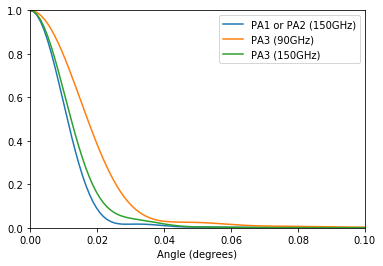

In [4]:
plt.plot(Beam_PA1[0], Beam_PA1[1], label='PA1 or PA2 (150GHz)')
plt.plot(Beam_PA3_90[0], Beam_PA3_90[1], label='PA3 (90GHz)')
plt.plot(Beam_PA3_150[0], Beam_PA3_150[1], label='PA3 (150GHz)')

plt.xlim([0, 0.1])
plt.ylim(0, 1)

plt.xlabel('Angle (degrees)')
plt.legend()

In [5]:
def Brightness_Temperature(Signal, Freq, Omega):
    """
    #------------------------------------------------#
    # Description: Computes the Brightness T in      #
    #              Kelvin for an FRB signal seen in  #
    #              the Atacama Cosmology Telescope.  #
    #                                                #
    # Parameters:                                    #
    #             Signal  : Signal Strength (Jy);    #
    #               Freq  : Frequency (GHz);         #
    #              Omega  : Solid Angle (sr);        #
    #------------------------------------------------#
    
    """
    
    # Boltzmann Constant:
    k_B = codata.value('Boltzmann constant')
    
    # Computes the radiation Wavelength (in meters):
    Lambda = 3e8/(Freq*1e9)
    
    # Jansky to J/m² Convertion:
    Jy_to_Jpm2 = 1e-26
    
    return ((Lambda**2)*Signal*Jy_to_Jpm2)/(2*k_B*Omega)


def Detector_Noise(Duration):
    """
    #------------------------------------------------#
    # Description: Computes the detector noise level #
    #              for a signal of given duration.   #
    #                                                #
    # Parameters:                                    #
    #             Duration  : Signal duration (ms);  #
    #------------------------------------------------#
    
    """
    
    # Average Detector Noise (in K√s):
    Av_Det_Noise = 400e-6
    
    # Computes the Noise Level:
    Noise_Level = Av_Det_Noise/np.sqrt(Duration/1000.)
    
    return Noise_Level

    
def Solid_Angle(Pol_Int, Az_Int, Beam):
    """
    #------------------------------------------------#
    # Description: Computes the instrument's beam    #
    #              solid angle integral for a given  #
    #              range of angles in spherical      #
    #              coordinates. 'Pol_Int' as well as #
    #              'Az_Int' must be a lists with two #
    #              elements each, determining the    #
    #              initial and final angles of       #
    #              integration for those variables.  #
    #              The 'Beam' must be an array of    #
    #              dimension 2 encapsulating the     #
    #              beam profile.                     #
    #                                                #
    # Parameters:                                    #
    #             Pol_Int  : Polar Angles (degrees); #
    #              Az_Int  : Azimuthal Angles (rad); #
    #                Beam  : Beam Profile;           #
    #------------------------------------------------#
    
    """
    
    # Converts the Beam Range to Radians:
    Range = Beam[0]*np.pi/180.
    
    # Computes the Azimuthal Integral:
    Phi_Partial = np.abs(Az_Int[1] - Az_Int[0])
    
    # Constructs a Filter Imposing the Polar Integration Limits:
    Filter = np.logical_and(Beam[0] > Pol_Int[0], Beam[0] < Pol_Int[1])
    
    # Computes the Polar Integration:
    Theta_Partial = np.trapz(Beam[1][Filter]*np.sin(Range[Filter]), Range[Filter])
    
    return Phi_Partial*Theta_Partial

In [4]:
def MonteCarlo_double(f, g, x_olim, y_olim, x_lim, y_lim, n):
    """
    #-------------------------------------------------#
    # Description:                                    #
    # Monte Carlo integration of f over a domain g>=0,#
    # n^2 is the number of random points.             #
    #                                                 #
    # Parameters:                                     #
    # f: integrand function                           #
    # g: function that decides which points are       #
    #    within bounds                                #
    # x_olim, y_olim: lists of overshot bounds of     #
    #                 integration                     #
    # x_lim, y_lim: lists of actual bounds of         #
    #               integration                       #
    # n: number of points to define intgration grid   #
    #-------------------------------------------------#
    """
    #Unpack Variables
    x0,x1 = x_olim[0],x_olim[1]
    y0,y1 = y_olim[0],y_olim[1]
    x_0,x_1 = x_lim[0],x_lim[1]
    y_0,y_1 = y_lim[0],y_lim[1]
    
    # Draw n**2 random points in the area of integration  
    x = np.random.uniform(x0, x1, n)
    y = np.random.uniform(y0, y1, n)
    
    # Compute sum of f values inside the integration domain
    f_mean = 0
    num_inside = 0   # number of x,y points inside domain (g>=0)
    for i in range(len(x)):
        for j in range(len(y)):
            if g(x[i], y[j],x_lim,y_lim) >= 0:
                num_inside += 1
                f_mean += f(x[i], y[j])
    f_mean = f_mean/float(num_inside)
    area = num_inside/float(n**2)*(x1 - x0)*(y1 - y0)
    return area*f_mean

def g(x, y,x_lim,y_lim):
    
    """
    x_lim: list of starting and ending bounds of x-integration
    y_lim: list of starting and ending bounds of y-integration
    """
    x0,x1 = x_lim[0],x_lim[1]
    y0,y1 = y_lim[0],y_lim[1]
    return(1 if (x0 <= x <= x1 and y0 <= y <= y1) else -1)
    
print MonteCarlo_double(lambda x, y: np.sin(x * y**2),g, [0,1.5*np.pi],[0,1.5*np.pi],[0,np.pi],[0,np.pi],100)



1.6713537383563768


In [6]:
print ('PA3 (90 GHz):')
Omega_PA3_90 = Solid_Angle([0.00, 0.055/4.], [0, 2*np.pi], Beam_PA3_90)/Solid_Angle([0, 0.9/4.], [0, np.pi*2.], Beam_PA3_90)
print (Omega_PA3_90)
print (Solid_Angle([0, 0.9/2.], [0, 2*np.pi], Beam_PA3_90), 'sr')

print ('PA3 (150 GHz):')
Omega_PA3_150 = Solid_Angle([0.00, 0.055/4.], [0, np.pi*2.], Beam_PA3_150)/Solid_Angle([0, 0.9/4.], [0, np.pi*2.], Beam_PA3_150)
print (Omega_PA3_150)
print (Solid_Angle([0.00, 0.9/2.], [0, 2*np.pi], Beam_PA3_150), 'sr')

PA3 (90 GHz):
0.2810352726223977
(5.181628445594052e-07, 'sr')
PA3 (150 GHz):
0.46305743139054945
(2.5517093858553015e-07, 'sr')


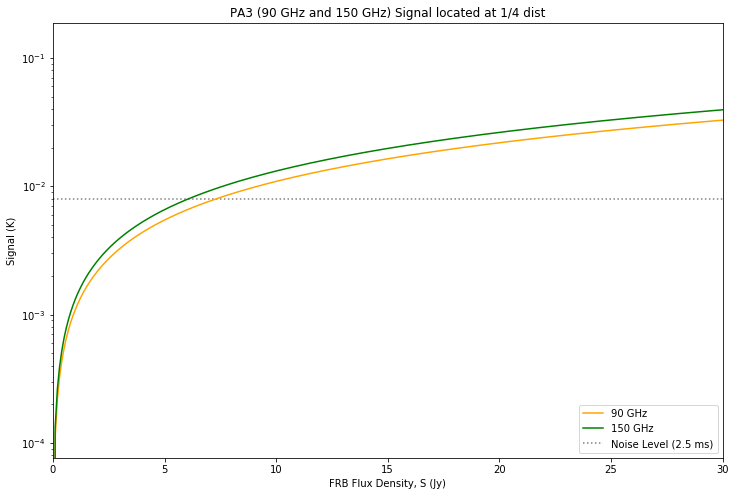

In [7]:
# Signal Range in Jansky:
Signal_Range = np.linspace(0, 100, 1000)

# Duration Range in Milliseconds:
Duration_Range = np.linspace(1, 10, 5)

plt.figure(figsize=(12,8))
plt.plot(Signal_Range, Brightness_Temperature(Signal_Range, 90, 5.18162844559e-07)*Omega_PA3_90/2., color='orange', label='90 GHz')
plt.plot(Signal_Range, Brightness_Temperature(Signal_Range, 150, 2.55170938586e-07)*Omega_PA3_150/2., color='green', label='150 GHz')

plt.hlines(Detector_Noise(2.5), Signal_Range.min(), Signal_Range.max(), alpha=0.5, linestyle='dotted', label='Noise Level (2.5 ms)')
#plt.hlines(Detector_Noise(7.5), Signal_Range.min(), Signal_Range.max(), alpha=0.5, linestyle='dashed', label='T = 7.5 ms')
#plt.hlines(Detector_Noise(15), Signal_Range.min(), Signal_Range.max(), alpha=0.5, linestyle='solid', label='T = 15 ms')

plt.yscale('log')
plt.xlim([0, 30])

plt.xlabel('FRB Flux Density, S (Jy)')
plt.ylabel('Signal (K)')

plt.title('PA3 (90 GHz and 150 GHz) Signal located at 1/4 dist')
plt.legend(loc=4)


In [8]:
print ('PA1 or PA2:')
Omega_PA1 = Solid_Angle([0, 0.035/2.], [0, 2*np.pi], Beam_PA1)/Solid_Angle([0, 0.9/2.], [0, np.pi*2.], Beam_PA1)
print (Omega_PA1, 'sr')

print ('PA3 (90 GHz):')
Omega_PA3_90 = Solid_Angle([0.00, 0.055/2.], [0, 2*np.pi], Beam_PA3_90)/Solid_Angle([0, 0.9/2.], [0, np.pi*2.], Beam_PA3_90)
print (Omega_PA3_90)
print (Solid_Angle([0, 0.9/2.], [0, 2*np.pi], Beam_PA3_90), 'sr')

print ('PA3 (150 GHz):')
Omega_PA3_150 = Solid_Angle([0.00, 0.055/2.], [0, np.pi*2.], Beam_PA3_150)/Solid_Angle([0, 0.9/2.], [0, np.pi*2.], Beam_PA3_150)
print (Omega_PA3_150)
print (Solid_Angle([0.00, 0.9/2.], [0, 2*np.pi], Beam_PA3_150), 'sr')

PA1 or PA2:
(0.6898806134298962, 'sr')
PA3 (90 GHz):
0.636731603120909
(5.181628445594052e-07, 'sr')
PA3 (150 GHz):
0.7933837845560876
(2.5517093858553015e-07, 'sr')


''

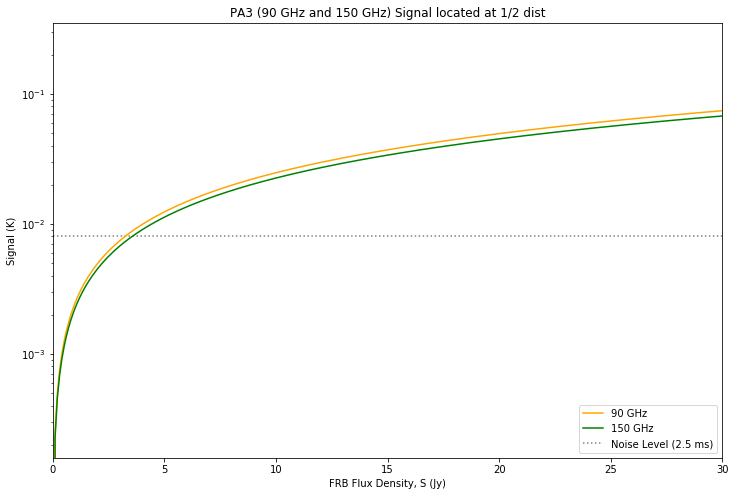

In [57]:
# Signal Range in Jansky:
Signal_Range = np.linspace(0, 100, 1000)

# Duration Range in Milliseconds:
Duration_Range = np.linspace(1, 10, 5)

plt.figure(figsize=(12,8))
plt.plot(Signal_Range, Brightness_Temperature(Signal_Range, 90, 5.18162844559e-07)*Omega_PA3_90/2., color='orange', label='90 GHz')
plt.plot(Signal_Range, Brightness_Temperature(Signal_Range, 150, 2.55170938586e-07)*Omega_PA3_150/2., color='green', label='150 GHz')

plt.hlines(Detector_Noise(2.5), Signal_Range.min(), Signal_Range.max(), alpha=0.5, linestyle='dotted', label='Noise Level (2.5 ms)')
#plt.hlines(Detector_Noise(7.5), Signal_Range.min(), Signal_Range.max(), alpha=0.5, linestyle='dashed', label='T = 7.5 ms')
#plt.hlines(Detector_Noise(15), Signal_Range.min(), Signal_Range.max(), alpha=0.5, linestyle='solid', label='T = 15 ms')

plt.yscale('log')
plt.xlim([0, 30])

plt.xlabel('FRB Flux Density, S (Jy)')
plt.ylabel('Signal (K)')

plt.title('PA3 (90 GHz and 150 GHz) Signal located at 1/2 dist')
plt.legend(loc=4)

# Prints Plot as a Figure: #############################################
                                                                      ##
# File Name:                                                          ##
file_name = 'Estimate'                                                ##
                                                                      ##
# Format Selection (Options: 'png', 'svg', 'eps')                     ##
file_format = 'pdf'                                                   ##
                                                                      ##

""                                                                   

plt.savefig(file_name + '.' + file_format,                            ##
            format=file_format,                                       ##
            dpi=900,                                                  ##
            orientation='portrait',                                   ##
            transparent=False,                                        ##
            bbox_inches='tight',                                      ##
            bbox_extra_artists=[],                                    ##
            pad_inches=0.2)                                           ##

""                                                                   

                                                                      ##
########################################################################

''

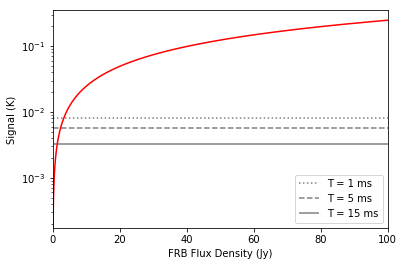

In [41]:
# Signal Range in Jansky:
Signal_Range = np.linspace(0, 100, 1000)

# Duration Range in Milliseconds:
Duration_Range = np.linspace(1, 10, 5)

plt.plot(Signal_Range, Brightness_Temperature(Signal_Range, 90, 5.19542477913e-07)*Omega_PA3_90/2., color='red')

plt.hlines(Detector_Noise(2.5), Signal_Range.min(), Signal_Range.max(), alpha=0.5, linestyle='dotted', label='T = 1 ms')
plt.hlines(Detector_Noise(5), Signal_Range.min(), Signal_Range.max(), alpha=0.5, linestyle='dashed', label='T = 5 ms')
plt.hlines(Detector_Noise(15), Signal_Range.min(), Signal_Range.max(), alpha=0.5, linestyle='solid', label='T = 15 ms')

plt.yscale('log')
plt.xlim([0, 100])

plt.xlabel('FRB Flux Density (Jy)')
plt.ylabel('Signal (K)')

plt.legend(loc=4)

# Prints Plot as a Figure: #############################################
                                                                      ##
# File Name:                                                          ##
file_name = 'Estimate'                                                ##
                                                                      ##
# Format Selection (Options: 'png', 'svg', 'eps')                     ##
file_format = 'pdf'                                                   ##
                                                                      ##
""    
                                                                      ##
plt.savefig(file_name + '.' + file_format,                            ##
            format=file_format,                                       ##
            dpi=900,                                                  ##
            orientation='portrait',                                   ##
            transparent=False,                                        ##
            bbox_inches='tight',                                      ##
            bbox_extra_artists=[],                                    ##
            pad_inches=0.2)                                           
""                                                                   
                                                                      ##
########################################################################